In [118]:
import warnings
warnings.filterwarnings("ignore")

In [119]:
import librosa
import os
import pandas as pd
import numpy as np
from PIL import Image
import pathlib
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
header = 'filename zero_crossing_rate spectral_centroid spectral_rolloff chroma_stft rms chroma_cqt chroma_cens chroma_vqt spectral_bandwidth spectral_contrast spectral_flatness poly_features tonnetz tempo dtempo tempogram fourier_tempogram tempogram_ratio'

for i in range (1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [121]:
filenames = []
zero_crossing_rates = [] 
spectral_centroids = []
spectral_rolloffs = []
chroma_stfts = []
rmss = []
chroma_cqts = []
chroma_censs = []
chroma_vqts = []
spectral_bandwidths = []
spectral_contrasts = []
spectral_flatnesss = []
poly_featuress = []
tonnetzs = []
tempos = []
dtempos = []
tempograms = []
fourier_tempograms = []
tempogram_ratios = []
mfcc1s = []
mfcc2s = []
mfcc3s = []
mfcc4s = []
mfcc5s = []
mfcc6s = []
mfcc7s = []
mfcc8s = []
mfcc9s = []
mfcc10s = []
mfcc11s = []
mfcc12s = []
mfcc13s = []
mfcc14s = []
mfcc15s = []
mfcc16s = []
mfcc17s = []
mfcc18s = []
mfcc19s = []
mfcc20s = []
labels = []

# Signal denoising

In [157]:
#Filtering low-frequencies source: https://www.kaggle.com/code/mauriciofigueiredo/methods-for-sound-noise-reduction
def f_high(y,sr):
    b,a = signal.butter(10, 2000/(sr/2), btype='highpass')
    yf = signal.lfilter(b,a,y)
    return yf

In [158]:
mfcc_car = 'mfcc1 mfcc2 mfcc3 mfcc4 mfcc5 mfcc6 mfcc7 mfcc8 mfcc9 mfcc10 mfcc11 mfcc12 mfcc13 mfcc14 mfcc15 mfcc16 mfcc17 mfcc18 mfcc19 mfcc20'.split()
categories = os.listdir('Cat and dog song/cats_dogs/train')
for c in categories:
    specific_cat = os.listdir('Cat and dog song/cats_dogs/train/'+c)
    for i in specific_cat:
        sound_arry, sample_rate = librosa.load('Cat and dog song/cats_dogs/train/'+c+'/'+i)
        sound_arry = f_high(sound_arry, sample_rate)
        zero_crossing_rate = round(librosa.zero_crossings(sound_arry, pad=False).mean(), 2)
        spectral_centroid = round(librosa.feature.spectral_centroid(y=sound_arry, sr=sample_rate).mean(), 2)
        spectral_rolloff = round(librosa.feature.spectral_rolloff(y=sound_arry, sr=sample_rate).mean(), 2)
        chroma_stft = round(librosa.feature.chroma_stft(y=sound_arry, sr=sample_rate).mean(), 2)
        rms = round(librosa.feature.rms(y=sound_arry).mean(), 2)
        chroma_cqt = round(librosa.feature.chroma_cqt(y=sound_arry, sr=sample_rate).mean(), 2)
        chroma_cens = round(librosa.feature.chroma_cens(y=sound_arry, sr=sample_rate).mean(), 2)
        chroma_vqt = round(librosa.feature.chroma_vqt(y=sound_arry,sr=sample_rate,intervals='ji5',bins_per_octave=36).mean(), 2)
        spectral_bandwidth = round(librosa.feature.spectral_bandwidth(y=sound_arry, sr=sample_rate).mean(), 2)
        S = np.abs(librosa.stft(sound_arry))
        spectral_contrast = round(librosa.feature.spectral_contrast(S=S, sr=sample_rate).mean(), 2)
        spectral_flatness = round(librosa.feature.spectral_flatness(y=sound_arry).mean(), 2)
        poly_features = round(librosa.feature.poly_features(S=S, order=0).mean(), 2)
        tonnetz = round(librosa.feature.tonnetz(y=sound_arry, sr=sample_rate).mean(), 2)
        onset_env = librosa.onset.onset_strength(y=sound_arry, sr=sample_rate)
        tempo = round(librosa.feature.tempo(onset_envelope=onset_env, sr=sample_rate).mean(), 2)
        dtempo = round(librosa.feature.tempo(onset_envelope=onset_env, sr=sample_rate,aggregate=None).mean(), 2)
        oenv = librosa.onset.onset_strength(y=sound_arry, sr=sample_rate)
        tempogram = round(librosa.feature.tempogram(onset_envelope=oenv, sr=sample_rate).mean(), 2)
        fourier_tempogram = round(librosa.feature.fourier_tempogram(onset_envelope=oenv, sr=sample_rate).mean(), 2)
        #tempogram_ratio = round(librosa.feature.tempogram_ratio(tg=tempogram, sr=sample_rate).mean(), 2)
        mfcc = librosa.feature.mfcc(y=sound_arry, sr=sample_rate)
        label = c
        filename = i
        
        
        for i in range(len(mfcc)):
            mfcc_car[i] = round(mfcc[i].mean(), 2)
            
        filenames.append(filename)
        zero_crossing_rates.append(zero_crossing_rate)
        spectral_centroids.append(spectral_centroid)
        spectral_rolloffs.append(spectral_rolloff)
        chroma_stfts.append(chroma_stft)
        rmss.append(rms)
        chroma_cqts.append(chroma_cqt)
        chroma_censs.append(chroma_cens)
        chroma_vqts.append(chroma_vqt)
        spectral_bandwidths.append(spectral_bandwidth)
        spectral_contrasts.append(spectral_contrast)
        spectral_flatnesss.append(spectral_flatness)
        poly_featuress.append(poly_features)
        tonnetzs.append(tonnetz)
        tempos.append(tempo)
        dtempos.append(dtempo)
        tempograms.append(tempogram)
        fourier_tempograms.append(fourier_tempogram)
        #tempogram_ratios.append(tempogram_ratio) 
        labels.append(label)
        mfcc1s.append(mfcc_car[0])
        mfcc2s.append(mfcc_car[1])
        mfcc3s.append(mfcc_car[2])
        mfcc4s.append(mfcc_car[3])
        mfcc5s.append(mfcc_car[4])
        mfcc6s.append(mfcc_car[5])
        mfcc7s.append(mfcc_car[6])
        mfcc8s.append(mfcc_car[7])
        mfcc9s.append(mfcc_car[8])
        mfcc10s.append(mfcc_car[9])
        mfcc11s.append(mfcc_car[10])
        mfcc12s.append(mfcc_car[11])
        mfcc13s.append(mfcc_car[12])
        mfcc14s.append(mfcc_car[13])
        mfcc15s.append(mfcc_car[14])
        mfcc16s.append(mfcc_car[15])
        mfcc17s.append(mfcc_car[16])
        mfcc18s.append(mfcc_car[17])
        mfcc19s.append(mfcc_car[18])
        mfcc20s.append(mfcc_car[19])

In [159]:
data = {'filename': filenames,
        'zero_crossing_rate': zero_crossing_rates,
        'spectral_centroid': spectral_centroids,
        'spectral_rolloff': spectral_rolloffs,
        'chroma_stft': chroma_stfts,
        'rms': rmss,
        'chroma_cqt': chroma_cqts,
        'chroma_cens': chroma_censs,
        'chroma_vqt': chroma_vqts,
        'spectral_bandwidth': spectral_bandwidths,
        'spectral_contrast': spectral_contrasts,
        'spectral_flatness': spectral_flatnesss,
        'poly_features': poly_featuress,
        'tonnetz': tonnetzs,
        'tempo': tempos,
        'dtempo': dtempos,
        'tempogram': tempograms,
        'fourier_tempogram': fourier_tempograms,
        #'tempogram_ratio': tempogram_ratios,
        'mfcc1': mfcc1s,
        'mfcc2': mfcc2s,
        'mfcc3': mfcc3s,
        'mfcc4': mfcc4s,
        'mfcc5': mfcc5s,
        'mfcc6': mfcc5s,
        'mfcc7': mfcc7s,
        'mfcc8': mfcc8s,
        'mfcc9': mfcc9s,
        'mfcc10': mfcc10s,
        'mfcc11': mfcc11s,
        'mfcc12': mfcc12s,
        'mfcc13': mfcc13s,
        'mfcc14': mfcc14s,
        'mfcc15': mfcc15s,
        'mfcc16': mfcc16s,
        'mfcc17': mfcc17s,
        'mfcc18': mfcc18s,
        'mfcc19': mfcc19s,
        'mfcc20': mfcc20s,
        'label': labels
       }

sound_data = pd.DataFrame(data)

In [124]:
sound_data

filename  zero_crossing_rate  spectral_centroid  \
0                        cat_1.wav                0.08            1538.28   
1                       cat_10.wav                0.17            2592.57   
2                      cat_100.wav                0.11            1886.78   
3                      cat_101.wav                0.11            1916.29   
4                      cat_102.wav                0.10            1764.04   
..                             ...                 ...                ...   
215     thriller-ambient-14563.mp3                0.01             196.02   
216       wind-in-trees-117477.mp3                0.17            2854.90   
217  wind__artic__cold-6195(1).mp3                0.04             619.21   
218  wind__artic__cold-6195(2).mp3                0.04             619.21   
219     wind__artic__cold-6195.mp3                0.04             619.21   

     spectral_rolloff  chroma_stft   rms  chroma_cqt  chroma_cens  chroma_vqt  \
0             3192.78         0.49  0.03        0.66         0.28        0.50   
1             4464.15         0.34  0.10        0.47         0.26        0.33   
2             3515.10         0.26  0.22        0.37         0.24        0.29   
3             3733.12         0.40  0.06        0.45         0.23        0.35   
4             3371.24         0.37  0.05        0.43         0.22        0.32   
..                ...          ...   ...         ...          ...         ...   
215            347.50         0.60  0.06        0.33         0.19        0.22   
216           5902.31         0.68  0.01        0.78         0.29        0.67   
217           1100.30         0.54  0.06        0.73         0.28        0.62   
218           1100.30         0.54  0.06        0.73         0.28        0.62   
219           1100.30         0.54  0.06        0.73         0.28        0.62   

     spectral_bandwidth  ...  mfcc12  mfcc13  mfcc14  mfcc15  mfcc16  mfcc17  \
0               1651.23  ...   -2.82    1.29   -9.03   -0.09   -5.88    0.25   
1               1668.67  ...   -2.97    2.54  -17.01    5.79   -9.92    7.56   
2               1534.39  ...    4.67   27.60    2.08  -15.03  -15.85  -13.01   
3               1710.46  ...  -12.37   -3.76  -12.26   -3.80   -5.46   -3.20   
4               1635.62  ...  -13.19   -5.22  -14.52   -3.61   -7.29    1.66   
..                  ...  ...     ...     ...     ...     ...     ...     ...   
215              322.76  ...   12.60   11.55    9.30    7.89    7.00    4.97   
216             2599.07  ...   -3.52   -6.80   -1.84   -5.41   -0.83   -4.37   
217              630.01  ...    2.08    1.04    0.45    1.70    2.73    4.73   
218              630.01  ...    2.08    1.04    0.45    1.70    2.73    4.73   
219              630.01  ...    2.08    1.04    0.45    1.70    2.73    4.73   

     mfcc18     mfcc19  mfcc20  label  
0     -5.50  -1.600000   -0.74    cat  
1     11.28  18.110001   17.01    cat  
2      4.00   1.960000  -18.50    cat  
3     -2.75  -2.070000    1.24    cat  
4     -1.07   5.090000    8.12    cat  
..      ...        ...     ...    ...  
215    1.22  -1.550000   -0.41   wind  
216   -0.10  -3.550000    0.21   wind  
217    3.71   3.670000    2.64   wind  
218    3.71   3.670000    2.64   wind  
219    3.71   3.670000    2.64   wind  

[220 rows x 39 columns]

In [125]:
X = sound_data[["zero_crossing_rate", "spectral_centroid", "spectral_rolloff", "chroma_stft", "rms", "chroma_cqt", 
                "chroma_cens", "chroma_vqt", "spectral_bandwidth", "spectral_contrast", "spectral_flatness", "poly_features",
               "tonnetz", "tempo", "dtempo", "tempogram", 'mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8',
                'mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']]
y = sound_data["label"]

In [126]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 99)

In [128]:
rf_clf = RandomForestClassifier().fit(X_train, y_train)

In [129]:
rf_clf.score(X_test, y_test)

0.9318181818181818

In [130]:
lr_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [131]:
lr_clf.score(X_test, y_test)

0.9318181818181818

In [132]:
GNB_clf = GaussianNB().fit(X_train, y_train)

In [133]:
GNB_clf.score(X_test, y_test)

0.9090909090909091

In [134]:
svc_clf = SVC(kernel='linear', probability=True).fit(X_train, y_train)

In [135]:
svc_clf.score(X_train, y_train)

0.9545454545454546

In [136]:
predictions = svc_clf.predict_proba(X_test)

In [137]:
predictions

array([[0.28755804, 0.63913938, 0.07330258],
       [0.76450112, 0.21084722, 0.02465166],
       [0.63266664, 0.3196428 , 0.04769055],
       [0.79797599, 0.16190514, 0.04011887],
       [0.61283577, 0.33789388, 0.04927036],
       [0.62389043, 0.32491954, 0.05119003],
       [0.68963906, 0.29636989, 0.01399106],
       [0.54685963, 0.44758173, 0.00555863],
       [0.69193698, 0.28212298, 0.02594004],
       [0.16443469, 0.78763858, 0.04792673],
       [0.9427375 , 0.0530906 , 0.0041719 ],
       [0.75096688, 0.21550271, 0.03353041],
       [0.66348122, 0.31520733, 0.02131144],
       [0.31824848, 0.6499697 , 0.03178182],
       [0.5078446 , 0.46173366, 0.03042174],
       [0.86726153, 0.10003099, 0.03270748],
       [0.68327684, 0.29877073, 0.01795244],
       [0.23031624, 0.73048688, 0.03919688],
       [0.15195811, 0.71009386, 0.13794804],
       [0.63680078, 0.31564171, 0.04755752],
       [0.60730172, 0.33361632, 0.05908196],
       [0.38110687, 0.44975688, 0.16913625],
       [0.

# PREDICTION

In [138]:
def framing(sig, fs=22050, win_len=1, win_hop=0.01):
    
    # compute frame length and frame step (convert from seconds to samples)
    frame_length = win_len * fs
    frame_step = win_hop * fs
    signal_length = len(sig)
    frames_overlap = frame_length - frame_step
    # Make sure that we have at least 1 frame+
    num_frames = np.abs(signal_length - frames_overlap) // np.abs(frame_length - frames_overlap)
    rest_samples = np.abs(signal_length - frames_overlap) % np.abs(frame_length - frames_overlap)
    # Pad Signal to make sure that all frames have equal number of samples
    # without truncating any samples from the original signal
    if rest_samples != 0:
        pad_signal_length = int(frame_step - rest_samples)
        z = np.zeros((pad_signal_length))
        pad_signal = np.append(sig, z)
        num_frames += 1
    else:
        pad_signal = sig
    # make sure to use integers as indices
    frame_length = int(frame_length)
    frame_step = int(frame_step)
    num_frames = int(num_frames)
    # compute indices
    idx1 = np.tile(np.arange(0, frame_length), (num_frames, 1))
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),(frame_length, 1)).T
    indices = idx1 + idx2
    frames = pad_signal[indices.astype(np.int32, copy=False)]
    return frames

In [139]:
from joblib import dump

In [140]:
dump(svc_clf, './model.joblib')

['./model.joblib']

# SIGNAL SEGMENTATION 

In [141]:
from scipy import signal
import random

In [142]:
sample_rate = 16000

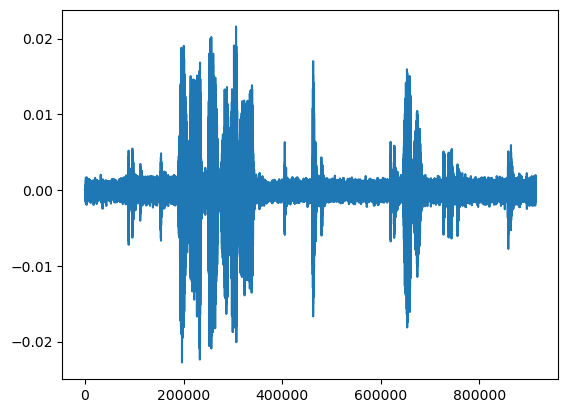

In [144]:
import IPython.display as ipd
#music_arry, sample_rate = librosa.load('bensound-worldonfire.mp3')
audio, _ = librosa.core.load('night-cat-fight-26307.mp3', sr=sample_rate, mono=True)
plt.plot(audio)
ipd.display(ipd.Audio(audio, rate=sample_rate))

In [145]:
yf1 = f_high(audio, sample_rate)

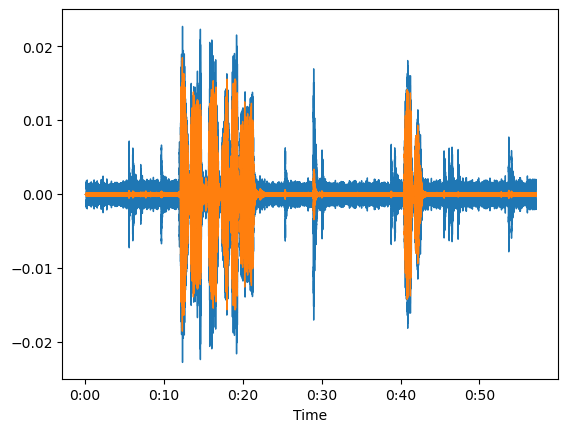

In [146]:
import librosa.display
librosa.display.waveshow(audio,sr=sample_rate, x_axis='time');
librosa.display.waveshow(yf1,sr=sample_rate, x_axis='time');

In [147]:
ipd.display(ipd.Audio(yf1, rate=sample_rate))  

# SEGMENTATION

In [148]:
class SNRSegmenter(object):

    def __init__(self, sample_rate, segment_len_ms, hop_len_ms, noise_len_ms, call_snr):
        self.segment_len_samples = int(sample_rate * segment_len_ms / 1000)
        self.hop_len_samples = int(sample_rate * hop_len_ms / 1000)
        self.noise_len_samples = int(sample_rate * noise_len_ms / 1000)

        self.call_snr = call_snr

    def _get_noise_level(self, sample):
        abs_max = []
        
        if len(sample) > self.noise_len_samples:
            idx = 0
            while idx + self.noise_len_samples < len(sample):
                abs_max.append(np.max(np.abs(sample[idx:(idx+self.noise_len_samples)])))
                idx += self.noise_len_samples
        else:
            abs_max.append(np.max(np.abs(sample)))

        return min(abs_max)

    def __call__(self, sample):
        
        noise_level = self._get_noise_level(sample)

        call_segments = []
        call_snrs = []

        if len(sample) > self.segment_len_samples:
            idx = 0
            while idx + self.segment_len_samples < len(sample):
                segment = sample[idx:(idx+self.segment_len_samples)]
                seg_abs_max = np.max(np.abs(segment))
                if seg_abs_max / noise_level > self.call_snr:
                    call_segments.append(segment)
                    call_snrs.append(seg_abs_max / noise_level)

                idx += self.hop_len_samples

        return call_segments, call_snrs

In [149]:
segment_len_ms = 2500
hop_len_ms = 1000
noise_len_ms = 500
call_snr_thresh = 5

segmenter = SNRSegmenter(sample_rate, segment_len_ms, hop_len_ms, noise_len_ms, call_snr_thresh)

calls, call_snrs = segmenter(yf1)

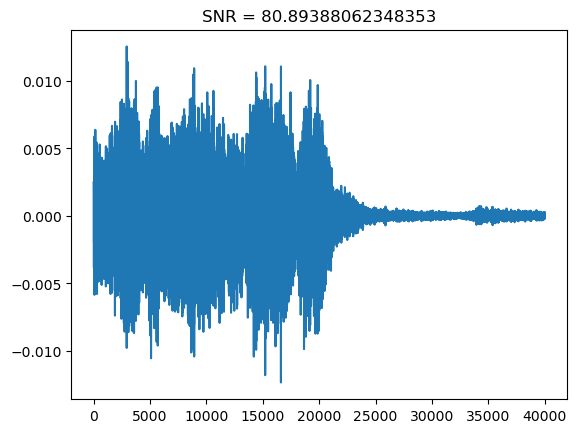

In [150]:
plt.title(f'SNR = {call_snrs[8]}')
plt.plot(calls[10])
ipd.display(ipd.Audio(calls[17], rate=sample_rate))  

# PREDICTION

In [151]:
#input features selection

def input_feature_extraction(input_file,sr=sample_rate, mono=True):
    feature_extracted = []
    result = []
    sound_arry, sample_rate = librosa.load(input_file)
    yf1 = f_high(sound_arry, sample_rate)
    segment_len_ms = 2500
    hop_len_ms = 1000
    noise_len_ms = 500
    call_snr_thresh = 5

    segmenter = SNRSegmenter(sample_rate, segment_len_ms, hop_len_ms, noise_len_ms, call_snr_thresh)
    calls, call_snrs = segmenter(yf1)
    
    for f in calls:
        feature_extracted.append(round(librosa.zero_crossings(f, pad=False).mean(), 2))
        feature_extracted.append(round(librosa.feature.spectral_centroid(y=f, sr=sample_rate).mean(), 2))
        feature_extracted.append(round(librosa.feature.spectral_rolloff(y=f, sr=sample_rate).mean(), 2))
        feature_extracted.append(round(librosa.feature.chroma_stft(y=f, sr=sample_rate).mean(), 2))
        feature_extracted.append(round(librosa.feature.rms(y=f).mean(), 2))
        feature_extracted.append(round(librosa.feature.chroma_cqt(y=f, sr=sample_rate).mean(), 2))
        feature_extracted.append(round(librosa.feature.chroma_cens(y=f, sr=sample_rate).mean(), 2))
        feature_extracted.append(round(librosa.feature.chroma_vqt(y=f,sr=sample_rate,intervals='ji5',bins_per_octave=36).mean(), 2))
        feature_extracted.append(round(librosa.feature.spectral_bandwidth(y=f, sr=sample_rate).mean(), 2))
        S = np.abs(librosa.stft(f))
        feature_extracted.append(round(librosa.feature.spectral_contrast(S=S, sr=sample_rate).mean(), 2))
        feature_extracted.append(round(librosa.feature.spectral_flatness(y=f).mean(), 2))
        feature_extracted.append(round(librosa.feature.poly_features(S=S, order=0).mean(), 2))
        feature_extracted.append(round(librosa.feature.tonnetz(y=f, sr=sample_rate).mean(), 2))
        onset_env = librosa.onset.onset_strength(y=f, sr=sample_rate)
        feature_extracted.append(round(librosa.feature.tempo(onset_envelope=onset_env, sr=sample_rate).mean(), 2))
        feature_extracted.append(round(librosa.feature.tempo(onset_envelope=onset_env, sr=sample_rate,aggregate=None).mean(), 2))
        oenv = librosa.onset.onset_strength(y=f, sr=sample_rate)
        feature_extracted.append(round(librosa.feature.tempogram(onset_envelope=oenv, sr=sample_rate).mean(), 2))
        mfcc = librosa.feature.mfcc(y=f, sr=sample_rate)

        for i in range(len(mfcc)):
            mfcc_car[i] = round(mfcc[i].mean(), 2)
            
        feature_extracted.append(mfcc_car[0])
        feature_extracted.append(mfcc_car[1])
        feature_extracted.append(mfcc_car[2])
        feature_extracted.append(mfcc_car[3])
        feature_extracted.append(mfcc_car[4])
        feature_extracted.append(mfcc_car[5])
        feature_extracted.append(mfcc_car[6])
        feature_extracted.append(mfcc_car[7])
        feature_extracted.append(mfcc_car[8])
        feature_extracted.append(mfcc_car[9])
        feature_extracted.append(mfcc_car[10])
        feature_extracted.append(mfcc_car[11])
        feature_extracted.append(mfcc_car[12])
        feature_extracted.append(mfcc_car[13])
        feature_extracted.append(mfcc_car[14])
        feature_extracted.append(mfcc_car[15])
        feature_extracted.append(mfcc_car[16])
        feature_extracted.append(mfcc_car[17])
        feature_extracted.append(mfcc_car[18])
        feature_extracted.append(mfcc_car[19])
        
        result.append(feature_extracted)
        feature_extracted=[] 
    return result

In [160]:
frames =input_feature_extraction('night-cat-fight-26307.mp3')
for f in frames:
    predictions = svc_clf.predict_proba(np.array(f).reshape(1, 36))
    print(predictions)

[[0.57975689 0.36635607 0.05388705]]
[[0.5874683 0.389594  0.0229377]]
[[0.55317608 0.43910639 0.00771753]]
[[0.47883341 0.5093319  0.01183469]]
[[0.45433396 0.52783406 0.01783199]]
[[0.62785481 0.35575072 0.01639447]]
[[0.73418222 0.25782966 0.00798812]]
[[0.80424553 0.18942454 0.00632994]]
[[0.86996494 0.12642829 0.00360677]]
[[0.83648244 0.15776843 0.00574914]]
[[0.78473186 0.20359444 0.0116737 ]]
[[0.62264324 0.34419857 0.03315819]]
[[0.60689314 0.32272453 0.07038233]]
[[0.74141715 0.2196843  0.03889856]]
[[0.67209843 0.2699789  0.05792267]]
[[0.53500167 0.39640056 0.06859777]]
[[0.67362217 0.30128967 0.02508815]]
[[0.85306074 0.1412015  0.00573776]]
[[0.79332191 0.19292706 0.01375103]]
[[0.7251416  0.25037985 0.02447855]]


In [170]:
frames =input_feature_extraction('night-cat-fight-26307.mp3')
event_time = []
predictions = []
start=0
elaspe_sec = 2.85
for f in frames:
    prediction = svc_clf.predict(np.array(f).reshape(1, 36))
    duration = str(round(start, 2))+' - '+str((round(start+elaspe_sec,2)))
    event_time.append(duration)
    start+=elaspe_sec
    predictions.append(prediction[0])
    
print(event_time)
print(predictions)

['0 - 2.85', '2.85 - 5.7', '5.7 - 8.55', '8.55 - 11.4', '11.4 - 14.25', '14.25 - 17.1', '17.1 - 19.95', '19.95 - 22.8', '22.8 - 25.65', '25.65 - 28.5', '28.5 - 31.35', '31.35 - 34.2', '34.2 - 37.05', '37.05 - 39.9', '39.9 - 42.75', '42.75 - 45.6', '45.6 - 48.45', '48.45 - 51.3', '51.3 - 54.15', '54.15 - 57.0']
['cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat']


In [171]:
df = pd.DataFrame(columns=['time', 'animal'])

In [172]:
df['time'] = event_time
df['animal'] = predictions

In [173]:
df

time animal
0       0 - 2.85    cat
1     2.85 - 5.7    cat
2     5.7 - 8.55    dog
3    8.55 - 11.4    dog
4   11.4 - 14.25    dog
5   14.25 - 17.1    cat
6   17.1 - 19.95    cat
7   19.95 - 22.8    cat
8   22.8 - 25.65    cat
9   25.65 - 28.5    cat
10  28.5 - 31.35    cat
11  31.35 - 34.2    cat
12  34.2 - 37.05    cat
13  37.05 - 39.9    cat
14  39.9 - 42.75    cat
15  42.75 - 45.6    cat
16  45.6 - 48.45    cat
17  48.45 - 51.3    cat
18  51.3 - 54.15    cat
19  54.15 - 57.0    cat